In [1]:
import sys
sys.path.insert(0, '/camp/home/maizelr/working/Rory/python_scripts')
from utils import *

import_my_tools()

/camp/home/maizelr/.local/lib/python3.8/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}



        # base packages
        import sys
        import pandas as pd
        import numpy as np
        import scipy as sp      
        import matplotlib.pyplot as plt
        import pickle
        import seaborn as sns
        import pickle
        import adjustText

        # velocity packages
        import scanpy as sc
        import scvelo as scv
        import anndata as ann
        import dynamo as dyn
        import cellrank as cr

        # extra packages
        import plotly as pl
        import plotly.graph_objects as go
        import plotly.express as px
        import ipywidgets as ipy
        


In [2]:
# base packages
import sys
import pandas as pd
import numpy as np
import scipy as sp      
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import pickle
import adjustText

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann
import dynamo as dyn
import cellrank as cr

# extra packages
import plotly as pl
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as ipy

In [3]:
mdata_0 = load_mouse_velocity()
hdata_0 = load_human_velocity()

Loading:  /camp/home/maizelr/working/Rory/transcriptomics/mouse_transcriptomics_data/full_data/new_mouse_velocity_20210121.loom
Variable names made unique.
Loading:  /camp/home/maizelr/working/Rory/transcriptomics/human_transcriptomics_analysis/data/new_human_velocity_20210121.loom
Variable names made unique.


In [4]:
mdata = mdata_0.copy()
sc.pp.normalize_total(mdata, target_sum=1e4)
sc.pp.log1p(mdata)
mdata.strings_to_categoricals()


hdata = hdata_0.copy()
sc.pp.normalize_total(hdata, target_sum=1e4)
sc.pp.log1p(hdata)
hdata.strings_to_categoricals()

In [5]:
hdata = hdata[hdata.obs.timepoint!='CS17']

In [6]:
m_dict = {'V3':['Nkx2-2','Neurog3','Sim1','Olig3','Sox21','Nkx6-1'],
            'MN':['Olig2','Lhx3','Isl1','Neurog2','Sp8','Nkx6-1','Isl2','Mnx1','Slc10a4','Slc18a3','Sox21'],
            'V2':['Sox21','Gata3','Tal1','Lhx3','Vsx2','Foxn4','Neurog2','Ascl1','Lhx1','Lhx5','Neurog1','Msx1',
                  'Irx3','Irx5','Pax6','Sp8','Nkx6-1','Bhlhe22','Sox14'],
            'V1':['Nkx6-2','En1','Dbx1','Dbx2','Pax2','Otp','Neurog2','Foxd3','Lhx1','Lhx5','Neurog1','Msx1',
                  'Irx3','Irx5','Pax6','Sp8','Prdm12','Pax8'],
            'V0':['Irx3','Irx5','Pax6','Dbx2','Dbx1','Sp8','Lhx1','Lhx5','Evx1','Evx2','Pitx2','Olig3',
                  'Neurog1','Neurog2','Sox21'],
            'dl6':['Pax3','Pax6','Pax7','Irx3','Irx5','Dbx1','Dbx2','Sp8','Lhx1','Lhx5','Pax8','Lbx1','Pax2',
                   'Dmrt3','Wt1','Neurog1','Ascl1','Neurog2','Lbx1','Sox21'],
            'dl5':['Pax3','Pax6','Pax7','Irx3','Irx5','Gsx2','Dbx2','Pou4f1','Tlx3','Prrxl1','Lbx1','Gsx1','Gsx2',
                   'Lmx1b','Ascl1','Sox21'],
            'dl4':['Pax3','Pax6','Pax7','Irx3','Irx5','Gsx2','Ascl1','Gbx2','Gsx1','Lhx1','Lhx5','Pax8','Lbx1',
                   'Pax2','Gbx1','Ptf1a','Neurog1','Sox21'],
            'dl3':['Pax3','Olig3','Pax7','Irx3','Irx5','Pax6','Gsx2','Ascl1','Gbx2','Pou4f1','Tlx3','Isl1','Prrxl1',
                   'Otp','Msx1','Neurog1','Neurog2','Sox21'],
            'dl2':['Pax3','Olig3','Pax7','Irx3','Irx5','Pax6','Msx1','Pou4f1','Foxd3','Lhx1','Lhx5',
                   'Neurog1','Neurog2','Sox21'],
            'dl1':['Pax3','Olig3','Pax7','Irx3','Irx5','Pax6','Msx1','Msx2','Pou4f1','Lhx2','Lhx9','Barhl1','Barhl2',
                   'Atoh1','Sox21']}

h_dict = {}
for key, item in m_dict.items():
    h_dict[key] = [a.upper() for a in item]
    
domains = ['V3','MN','V2','V1','V0','dl6','dl5','dl4','dl3','dl2','dl1']
datas = {'mouse':mdata,'human':hdata}
dictodict = {'mouse':m_dict,'human':h_dict}


def temporal_BROV_genes(data, species, n=2000):
    """ temporally stratified biologically relevant or variable genes"""
    gene_sets = []
    for time in data.obs.timepoint.unique():
        copy = data.copy()
        copy = copy[copy.obs.timepoint==time]
        scv.pp.filter_genes_dispersion(copy, n_top_genes=n)
        tp_genes = copy.var_names  
        gene_sets.append(tp_genes)
    hv_genes = set(gene_sets[0]).intersection(*gene_sets[1:])
    br_genes = gene_list('nt', species=species)
    genes = list(set(hv_genes).union(set(br_genes)))
    genes = list(set(genes).intersection(set(data.var_names)))
    print(len(genes), ' Genes Chosen')
    return genes

In [28]:
from velocity_embedding_stream_fixed import velocity_embedding_stream

In [39]:
def run_dynamics(adata, species, domain, weight, terminal, initial):
    print("Processing {0}...".format(domain))
    dom_data = adata[adata.obs.domain==domain]
    'Selecting Genes...'
    dom_genes = temporal_BROV_genes(dom_data, species, n=2000)
    print('{0} Genes Total.'.format(len(dom_genes)))
    dom_data = dom_data[:,dom_genes]
    scv.pp.moments(dom_data, n_pcs=30, n_neighbors=30)
    scv.tl.recover_dynamics(dom_data)
    scv.tl.velocity(dom_data, mode='stochastic')
    scv.tl.velocity_graph(dom_data)
    scv.tl.velocity_embedding(dom_data, basis='pca')
    scv.tl.latent_time(dom_data)
    sc.tl.rank_genes_groups(dom_data, groupby='cell_type', n_genes=8)
    cr.tl.terminal_states(dom_data, cluster_key='cell_type', weight_connectivities=weight, n_states=terminal);
    cr.tl.initial_states(dom_data, cluster_key='cell_type', n_states=initial)
    cr.tl.lineages(dom_data)
    scv.tl.recover_latent_time(dom_data, root_key='initial_states_probs', end_key='terminal_states_probs')
    fig = plt.figure(figsize=(36,16))
    (ax1, ax2, ax3), (ax4, ax5, ax6)  = fig.subplots(nrows=2, ncols=3)
    velocity_embedding_stream(dom_data, color=['cell_subtype'],
                                     basis='pca', legend_fontsize=22, title=[f'{domain} PCA: Cell Type'], 
                                     smooth=.8, min_mass=4, figsize=(12,8), fontsize=22, dpi=400, ax=ax1, show=False,
                                     density=0.6, linewidth=3, arrowsize=2.5)
    velocity_embedding_stream(dom_data, color=['timepoint'], color_map='gnuplot',
                                     basis='pca', legend_fontsize=12, title=['B. PCA: Timepoint'], 
                                     smooth=.8, min_mass=4, figsize=(12,8), fontsize=22, dpi=400, ax=ax2, show=False,
                                     density=0.5, linewidth=4)
    velocity_embedding_stream(dom_data, color=['latent_time'],color_map='viridis',
                                     basis='pca', legend_fontsize=12, title=['C. PCA: Latent Time'], 
                                     smooth=.8, min_mass=4, figsize=(12,8), fontsize=22, dpi=400, ax=ax3, show=False,
                                     density=0.5, linewidth=1)
    cr.pl.terminal_states(dom_data, discrete=True, title='D. Predicted Terminal States', dpi=400,
                          fontsize=22, figsize=(12,8), legend_fontsize=22, size=500, ax=ax4, show=False)
    cr.pl.lineages(dom_data, same_plot=True, show=False, fontsize=22, ax=ax5, dpi=400, title='Lineages')
    cr.pl.initial_states(dom_data, discrete=True, title='F. Predicted Initial State (One Enforced)', dpi=400,
                          fontsize=22, figsize=(12,8), legend_fontsize=22, size=500, ax=ax6, show=False)
    plt.show()
    return dom_data

Processing MN...
Exctracted 2000 highly variable genes.
Exctracted 2000 highly variable genes.
Exctracted 2000 highly variable genes.
325  Genes Chosen
325 Genes Total.
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:00:48) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph


/camp/home/maizelr/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:683: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/camp/home/maizelr/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:686: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)



computing latent time using initial_states_probs, terminal_states_probs as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


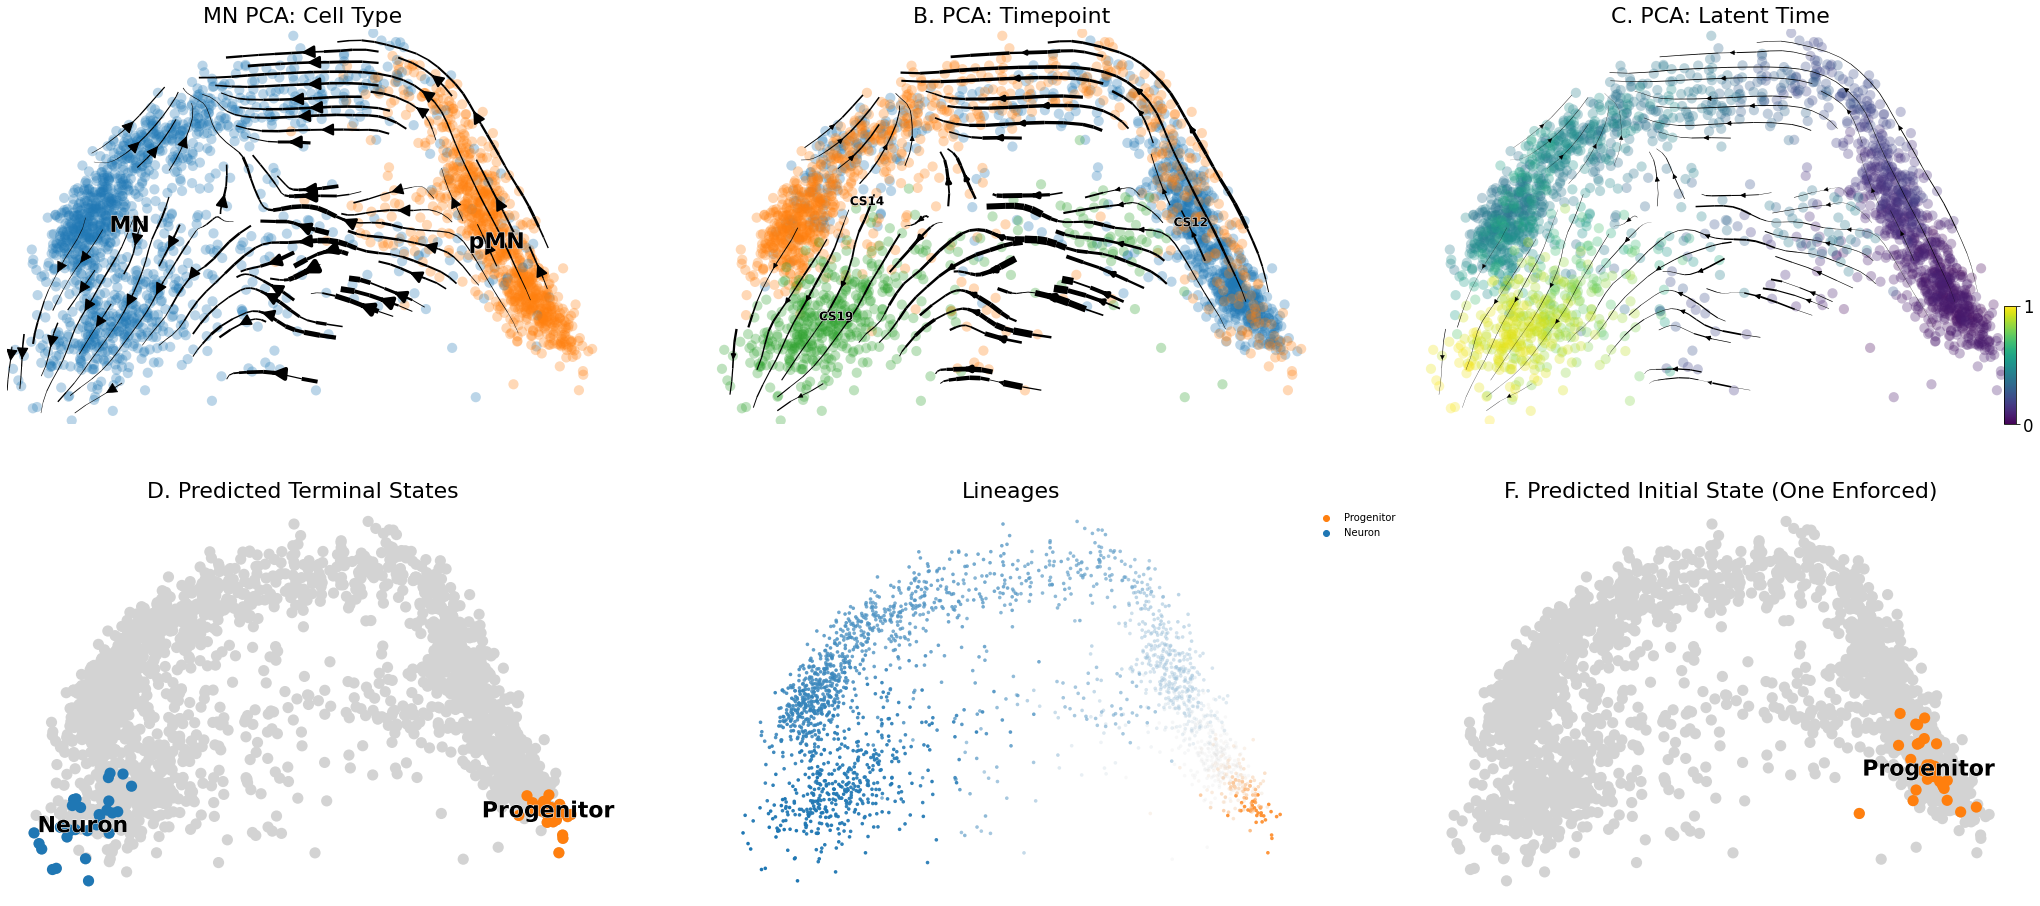

Processing MN...
Exctracted 2212 highly variable genes.
Exctracted 2000 highly variable genes.
Exctracted 2000 highly variable genes.
Exctracted 2000 highly variable genes.
Exctracted 2000 highly variable genes.
Exctracted 2000 highly variable genes.
225  Genes Chosen
225 Genes Total.
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:00:28) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph


/camp/home/maizelr/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:683: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/camp/home/maizelr/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:686: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)



computing latent time using initial_states_probs, terminal_states_probs as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


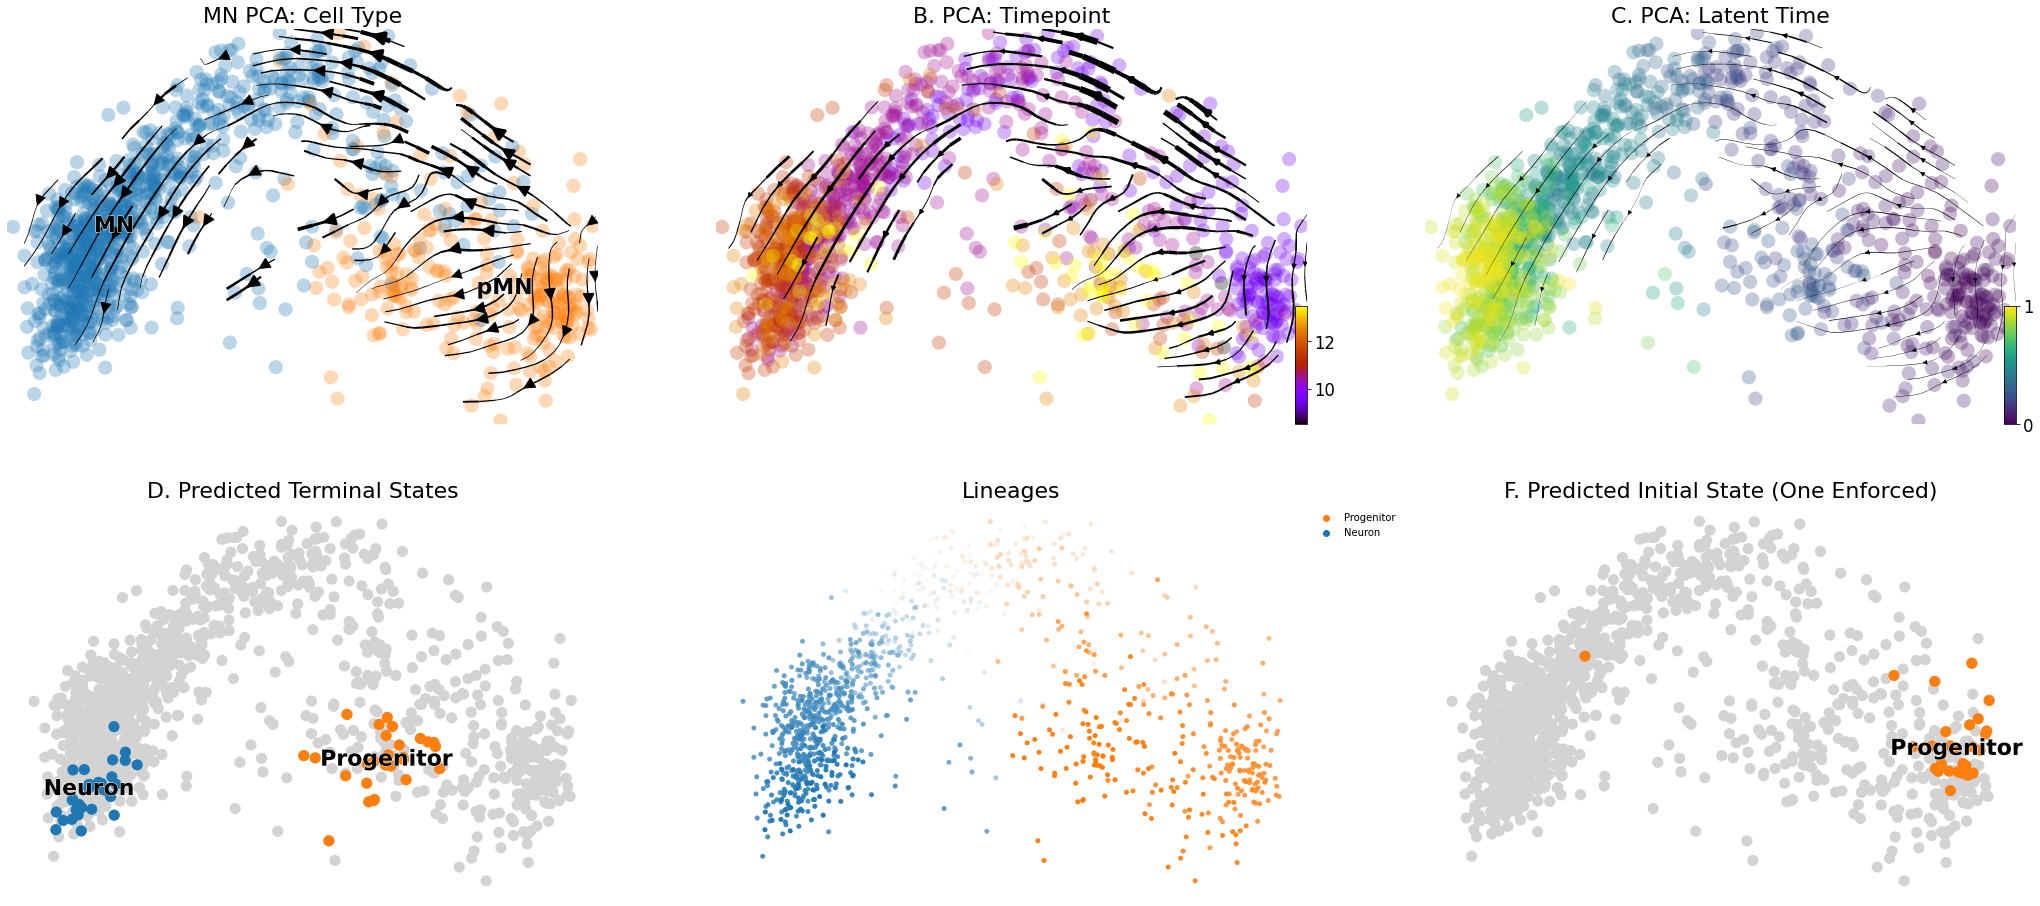

In [40]:
hdom = run_dynamics(hdata, 'human', 'MN', weight=0.7, terminal=2, initial=1)
mdom = run_dynamics(mdata, 'mouse', 'MN', weight=0.2, terminal=2, initial=1)

In [9]:
def get_trends(adata, genes, lineage, norm=False, n_knots=6, n_order=3, n_points=200):
    datmat = np.zeros((len(genes),n_points))
    conint = np.zeros(len(genes))
    failed = np.zeros(len(genes))
    fail = 0
    fgenes = []
    for i, gene in enumerate(genes):
        try:
            model = cr.ul.models.GAM(adata, n_knots=n_knots, spline_order=n_order)
            model.prepare(gene, lineage, n_test_points=n_points)
            model.fit()
            y = model.predict()
            ci = model.confidence_interval()
            c = np.max(np.abs(ci[:,0] - ci[:,1]))
            if norm:
                y = (y-y.min())/(y.max()-y.min())
            datmat[i,:] = y
            conint[i] = c
        except RuntimeError:
            fail += 1
            fgenes.append(gene)
            failed[i] = 1
    print(f"Warning: failed to model {fail} genes:")
    for g in fgenes:
        print(g,end=' ')
    print()
    return datmat, conint, failed

In [10]:
mg = ["Olig2","Sp8","Neurog2",'Neurod4',"Lhx3","Mnx1","Isl2","Elavl3"]
hg = [g.upper() for g in mg]

hX, hC, hF = get_trends(hdom, hg, 'Neuron', norm=True)
mX, mC, mF = get_trends(mdom, mg, 'Neuron', norm=True)


did not converge



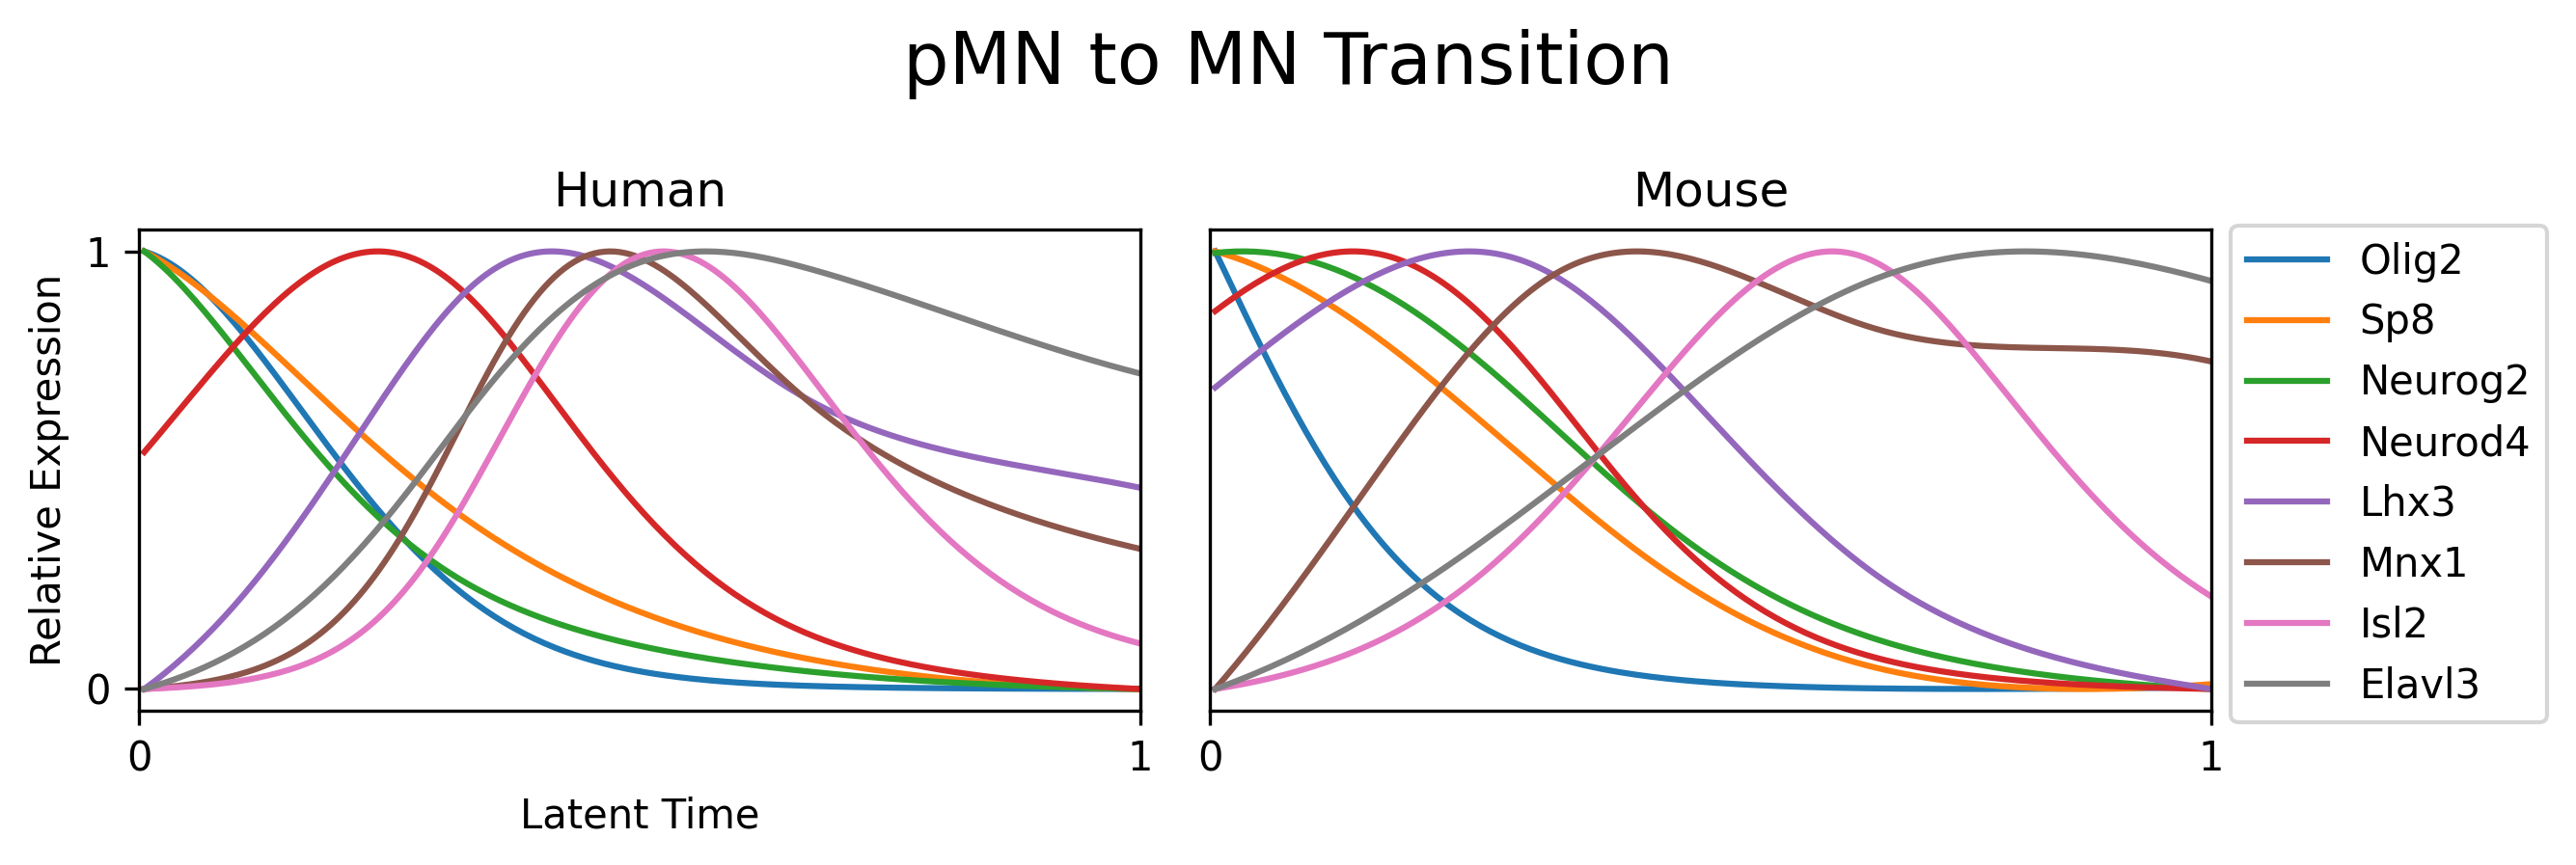

In [16]:
fig = plt.figure(figsize=(9,3), dpi=300)
axes = fig.subplots(1,2)
plt.tight_layout()
ax = axes[0]
for i, g in enumerate(hX):
    ax.plot(np.linspace(1,len(g),len(g)), g)
    ax.set_title("Human")
    ax.set_yticks([0,1])
    ax.set_xticks([0,200])
    ax.set_xticklabels([0,1])
    ax.set_ylabel('Relative Expression')
    ax.set_xlabel('Latent Time')
    ax.set_xlim([0,200])
ax = axes[1]
for i, g in enumerate(mX):
    ax.set_title("Mouse")
    ax.plot(np.linspace(1,len(g),len(g)), g, label=mg[i])
    ax.set_yticks([])
    ax.set_xticks([0,200])
    ax.set_xticklabels([0,1])
    ax.set_xlim([0,200])
plt.legend(bbox_to_anchor=(1, 1.05))
plt.suptitle('pMN to MN Transition', fontsize=18)
plt.tight_layout()
plt.savefig('../plots/8_MN_Transition.png', bbox_inches='tight')
plt.show()

In [15]:
scv.logging.print_versions()

scvelo==0.2.2  scanpy==1.6.0  anndata==0.7.5  loompy==3.0.6  numpy==1.19.4  scipy==1.5.4  matplotlib==3.3.3  sklearn==0.23.2  pandas==1.2.3  
